<a href="https://colab.research.google.com/github/subhra-15/Introduction-to-Machine-Learning/blob/master/Linear%20Regression/Mean_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Internshala Machine learning/Notebooks/Module 5/Transformed_Housing_Data2[1].csv')
df

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [2]:
df['mean_sales']=df['Sale_Price'].mean()
df['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

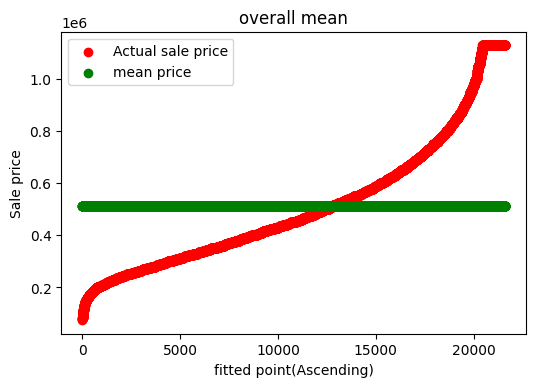

In [3]:
#visualization of mean prediction model
import matplotlib.pyplot as plt

plt.figure(dpi=100)
k=range(0,len(df))
plt.scatter(k,df['Sale_Price'].sort_values(),color='red',label='Actual sale price')
plt.scatter(k,df['mean_sales'].sort_values(),color='green',label='mean price')
plt.xlabel('fitted point(Ascending)')
plt.ylabel('Sale price')
plt.title('overall mean')
plt.legend()

# **Improving Upon The Mean Regression Model**

A better way is to calculate average sale price with respect to overall grade of the house 

In [6]:
import numpy as np

grade_means=df.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grade_means

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [32]:
#making new column
pd.set_option('mode.chained_assignment', None)
df['grade_mean']=0

# for every grade fill its mean price in new column

for i in grade_means.columns:
  df['grade_mean'][df['Overall Grade']==i]=grade_means[i][0]
df['grade_mean'].head()


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

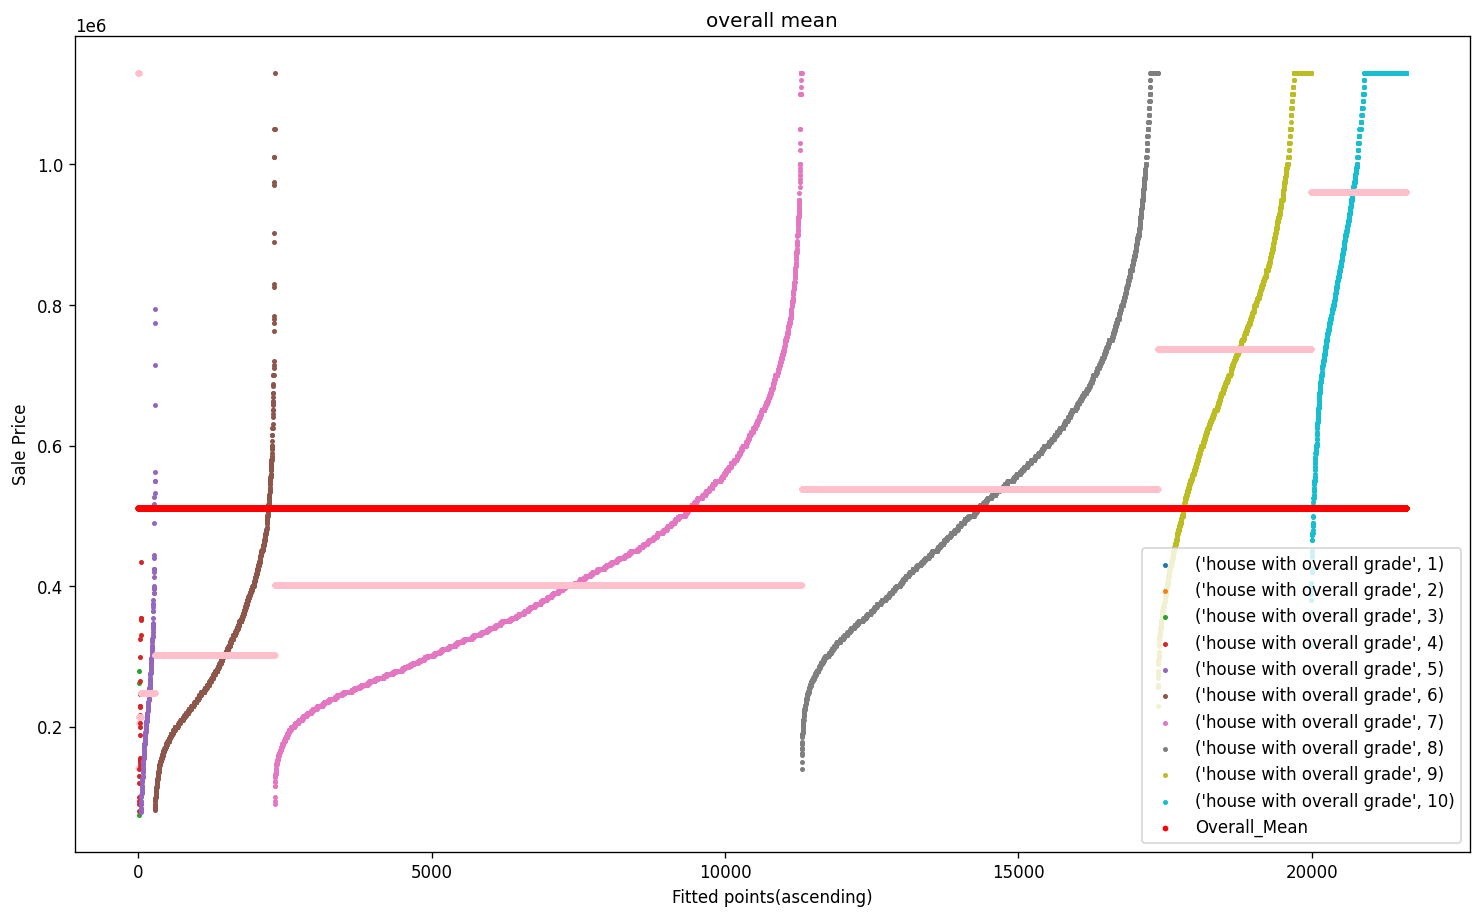

In [42]:
gradewise_list=[]
for i in range(1,11):
  k=df['Sale_Price'][df['Overall Grade']==i]
  gradewise_list.append(k)

classwise_list=[]
for i in range(1,11):
  k=df['Sale_Price'][df['Overall Grade']==i]
  classwise_list.append(k)

plt.figure(dpi=120, figsize=(15,9))

#### Plotting Sale_price gradewise####
# z variable on x axis

z=0
for i in range (1,11):
  #defining x-axis using z
  points=[k for k in range (z,z+len(classwise_list[i-1]))]
  
  #plotting
  plt.scatter(points,classwise_list[i-1].sort_values(),label=('house with overall grade',i),s=4)

  #plotting gradewise mean

  plt.scatter(points,[classwise_list[i-1].mean()for q in range(len(classwise_list[i-1]))],s=6,color='pink')
  z=max(points)+1

#plotting overall mean
plt.scatter([q for q in range (0,z)],
            df['mean_sales'],
            color='red',
            label='Overall_Mean',
            s=6)
plt.xlabel('Fitted points(ascending)')
plt.ylabel('Sale Price')
plt.title('overall mean')
plt.legend(loc=4)


# **Residual Plot**

RESIDUAL: it is the difference between predicted value and actual value

RESIDUAL PLOT: A residual plot is the scatter plot of difference between the predicted and actual value

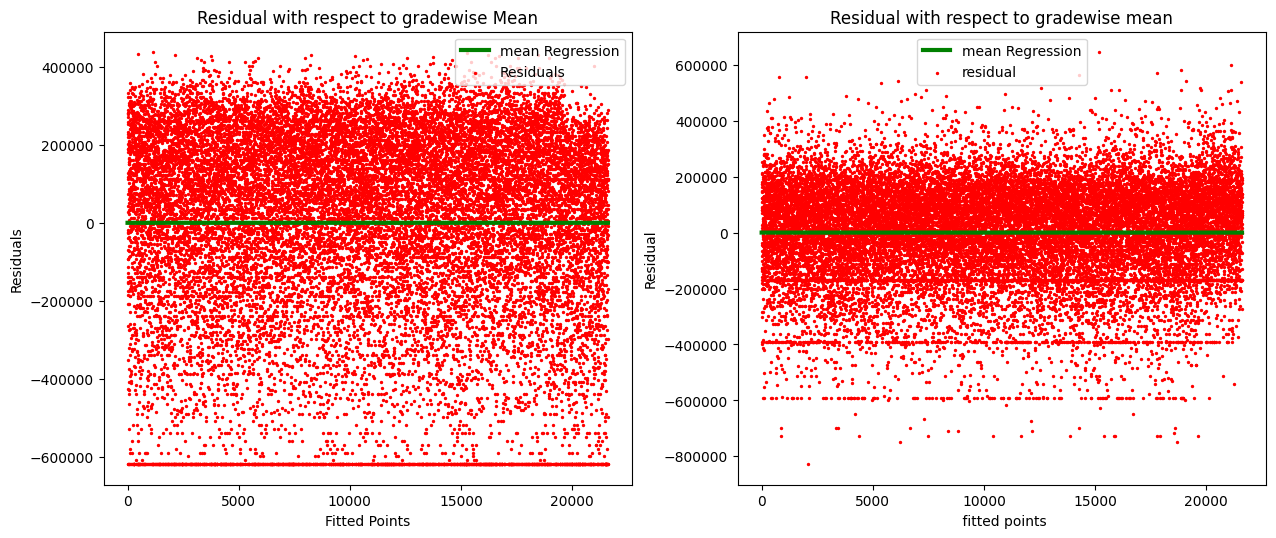

In [45]:
mean_difference =df['mean_sales']-df['Sale_Price']
grade_mean_difference=df['grade_mean']-df['Sale_Price']

k =range (0, len(df))
l=[0 for i in range (len(df))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)

plt.plot(k,l,color='green',label='mean Regression',lineWidth=3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residual with respect to gradewise Mean')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(k, grade_mean_difference,color='red',label='residual',s=2)
plt.plot(k,l,color='green',label='mean Regression',lineWidth=3)
plt.xlabel(' fitted points')
plt.ylabel('Residual')
plt.legend
plt.title("Residual with respect to gradewise mean")
plt.legend()

# **Mean Absolute Error**

In [46]:
y= df['Sale_Price']
y_hat1=df['mean_sales']
y_hat2=df['grade_mean']

from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(y_hat2,y)
cost_grade_mean

137081.7029820291

# **Mean Square Error**

In [47]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(y_hat1,y)
cost_grade_mean=mean_squared_error(y_hat2,y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

# **Root Mean Square Error**

In [48]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(y_hat1,y)**0.5
cost_grade_mean=mean_squared_error(y_hat2,y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)